In [52]:
from breeze_connect import BreezeConnect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd

In [53]:
breeze = BreezeConnect(api_key = 'ge528J31807C23m1138209727YT28K7*')

In [54]:
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("ge528J31807C23m1138209727YT28K7*"))


https://api.icicidirect.com/apiuser/login?api_key=ge528J31807C23m1138209727YT28K7%2A


In [55]:
breeze.generate_session(api_secret="7$`4002714a8v&50&014906179j^4881",
                        session_token="21876751")

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\Anuko\AppData\Local\Temp\ipykernel_7944\3828322551.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
def gen_paths(S0, r, sigma, T, M, I):
    '''
    S0: starting stock price
    r: constant short rate
    sigma: constant volatility
    T: final Time horizon
    M: number of time steps/intervals
    I: number of paths to be simulated
    '''

    dt = T/M
    paths = np.zeros((M+1,I))
    paths[0] = S0
    for t in range (1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand-rand.mean())/rand.std()
        paths[t] = paths[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*rand)
    return paths

In [5]:
paths = gen_paths(100, 0.05, 0.2, 1, 50, 250000)

In [6]:
100*math.exp(0.05*1)

105.12710963760242

In [7]:
paths[-1].mean()

105.11674335192767

Text(0, 0.5, 'index level')

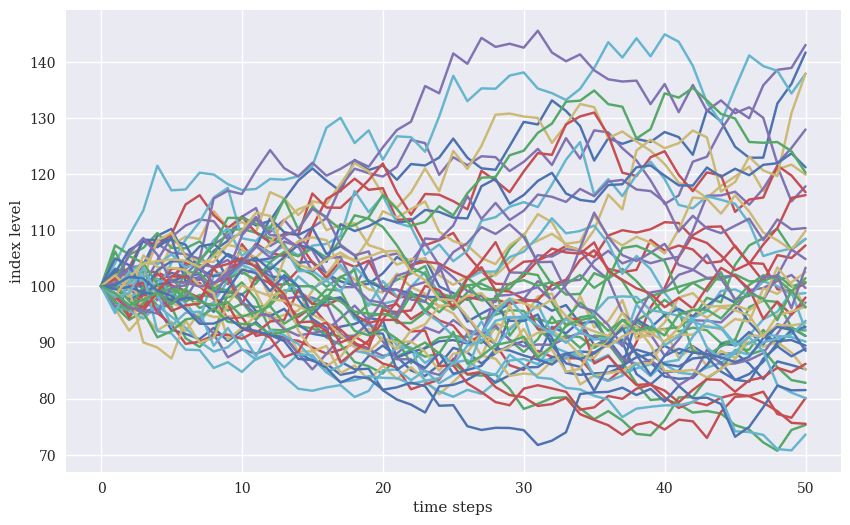

In [8]:
plt.figure(figsize=(10,6))
plt.plot(paths[:, :50])
plt.xlabel('time steps')
plt.ylabel('index level')

In [9]:
paths[:,0].round(3)

array([100.   , 100.329, 101.995, 100.567, 101.026, 102.403, 101.64 ,
       102.234, 106.326, 108.113, 112.434, 110.843, 111.675, 115.423,
       118.852, 121.019, 118.836, 116.928, 122.523, 120.728, 121.522,
       118.987, 121.785, 121.532, 122.948, 126.32 , 122.917, 121.027,
       120.766, 124.99 , 129.298, 128.84 , 133.137, 131.245, 128.563,
       122.409, 126.392, 125.391, 126.257, 125.722, 127.494, 126.586,
       123.434, 131.405, 129.417, 124.87 , 122.905, 122.934, 132.573,
       136.078, 141.659])

In [10]:
log_returns = np.log(paths[1:]/paths[:-1])
log_returns[:,0].round(3)

array([ 0.003,  0.016, -0.014,  0.005,  0.014, -0.007,  0.006,  0.039,
        0.017,  0.039, -0.014,  0.007,  0.033,  0.029,  0.018, -0.018,
       -0.016,  0.047, -0.015,  0.007, -0.021,  0.023, -0.002,  0.012,
        0.027, -0.027, -0.015, -0.002,  0.034,  0.034, -0.004,  0.033,
       -0.014, -0.021, -0.049,  0.032, -0.008,  0.007, -0.004,  0.014,
       -0.007, -0.025,  0.063, -0.015, -0.036, -0.016,  0.   ,  0.075,
        0.026,  0.04 ])

In [37]:
def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [38]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.14996
           max         0.15066
          mean         0.00060
           std         0.02828
          skew         0.00019
      kurtosis         0.00166


In [40]:
#annualized mean log return
print(log_returns.mean()*50+0.5*0.2**2)
#annualized volatility
print(log_returns.std()*math.sqrt(50))

0.05000000000000003
0.19999999999999996


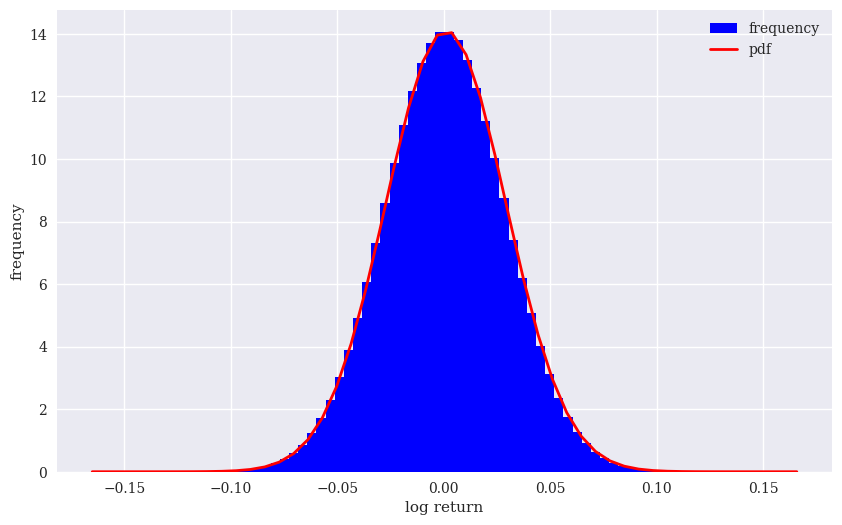

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=0.05/50, scale=0.2 / np.sqrt(50)),'r', lw=2.0, label='pdf')
plt.legend();

In [42]:
def normality_tests(arr):
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [43]:
normality_tests(log_returns.flatten())

Skew of data set          0.000
Skew test p-value          0.779
Kurt of data set          0.002
Kurt test p-value          0.230
Norm test p-value          0.467


Text(0.5, 1.0, 'log data')

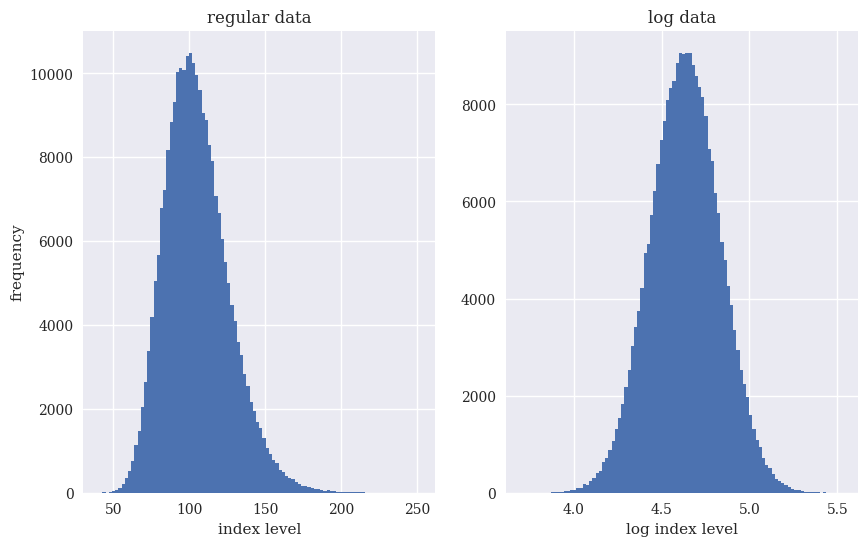

In [51]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.hist(paths[-1], bins=100)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=100)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

Real World Data

In [110]:
stocks = ["ITC", "HDFBAN", "ICIBAN", "HINLEV"]
from_date = "2018-01-01"
to_date = "2023-08-01"

In [111]:
data = []
for stock in stocks:
    dict = breeze.get_historical_data(interval="1day", from_date=from_date, to_date=to_date, stock_code=stock, exchange_code="NSE", product_type="cash")
    df = pd.DataFrame([[x['datetime'][:10], float(x['close'])] for x in dict['Success']], columns = ['Date', stock])
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df.set_index('Date', inplace=True)
    if len(data)==0:
        data = df
    else:
        data = data.join(df)

data

,ITC,HDFBAN,ICIBAN,HINLEV
Date,,,,
2018-01-01,262.30,927.25,310.30,1344.50
2018-01-02,260.75,936.18,309.70,1338.60
2018-01-03,261.15,926.33,315.00,1350.35
2018-01-04,261.55,929.95,314.70,1352.25
2018-01-05,262.90,931.80,312.90,1356.55
...,...,...,...,...
2023-07-26,472.25,1690.70,996.45,2583.30
2023-07-27,465.05,1673.15,990.25,2569.85
2023-07-28,468.45,1643.50,996.20,2584.60


<Axes: xlabel='Date'>

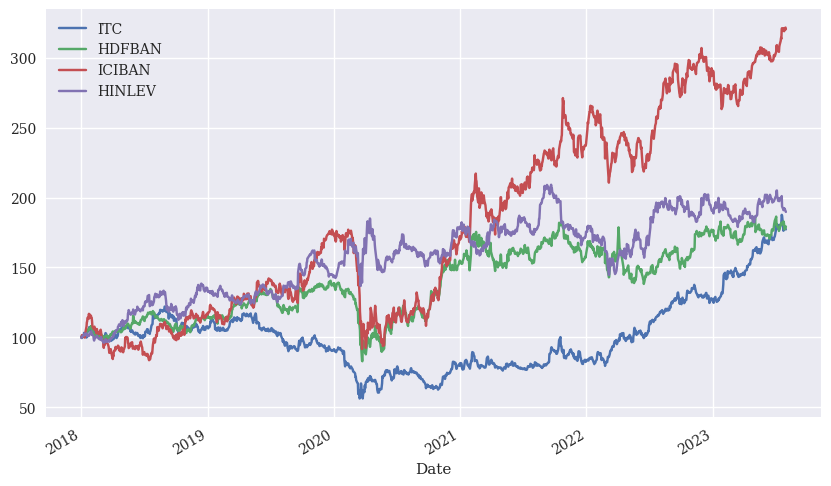

In [113]:
(data/data.iloc[0]*100).plot(figsize=(10,6))

                 ITC    HDFBAN    ICIBAN    HINLEV
Date                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02 -0.005927  0.009585 -0.001935 -0.004398
2018-01-03  0.001533 -0.010577  0.016969  0.008740
2018-01-04  0.001531  0.003900 -0.000953  0.001406
2018-01-05  0.005148  0.001987 -0.005736  0.003175


array([[<Axes: title={'center': 'ITC'}>,
        <Axes: title={'center': 'HDFBAN'}>],
       [<Axes: title={'center': 'ICIBAN'}>,
        <Axes: title={'center': 'HINLEV'}>]], dtype=object)

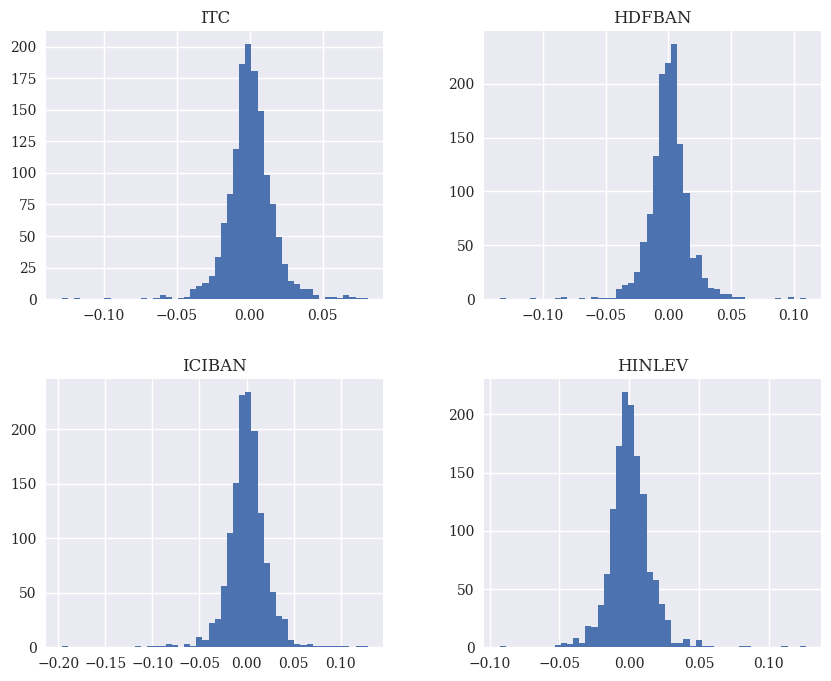

In [115]:
log_returns = np.log(data/data.shift(1))
print(log_returns.head())
log_returns.hist(bins=50, figsize=(10,8))

In [118]:
for stock in stocks:
    print("Results for {}".format(stock))
    print(30*'-')
    log_data = np.array(log_returns[stock].dropna())
    print_statistics(log_data)
    print()


Results for ITC
------------------------------
     statistic           value
------------------------------
          size      1382.00000
           min        -0.12874
           max         0.08097
          mean         0.00041
           std         0.01632
          skew        -0.45257
      kurtosis         8.13883

Results for HDFBAN
------------------------------
     statistic           value
------------------------------
          size      1382.00000
           min        -0.13475
           max         0.10975
          mean         0.00042
           std         0.01641
          skew        -0.24944
      kurtosis         9.77512

Results for ICIBAN
------------------------------
     statistic           value
------------------------------
          size      1382.00000
           min        -0.19660
           max         0.12894
          mean         0.00084
           std         0.02121
          skew        -0.46397
      kurtosis         9.86683

Results for H

In [120]:
for stock in stocks:
    print("Results for {}".format(stock))
    print(30*'-')
    log_data = np.array(log_returns[stock].dropna())
    normality_tests(log_data)
    print()

Results for ITC
------------------------------
Skew of data set         -0.453
Skew test p-value          0.000
Kurt of data set          8.139
Kurt test p-value          0.000
Norm test p-value          0.000

Results for HDFBAN
------------------------------
Skew of data set         -0.249
Skew test p-value          0.000
Kurt of data set          9.775
Kurt test p-value          0.000
Norm test p-value          0.000

Results for ICIBAN
------------------------------
Skew of data set         -0.464
Skew test p-value          0.000
Kurt of data set          9.867
Kurt test p-value          0.000
Norm test p-value          0.000

Results for HINLEV
------------------------------
Skew of data set          0.852
Skew test p-value          0.000
Kurt of data set          8.631
Kurt test p-value          0.000
Norm test p-value          0.000



In [123]:
weights = np.random.random(len(stocks))
weights = weights/np.sum(weights)
weights

array([0.48678784, 0.19980786, 0.03720943, 0.27619487])

In [135]:
def port_ret(weights):
    return np.sum(log_returns.mean()*weights)*252

def port_vol(weights):
    return math.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

In [136]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(len(stocks))
    weights/=np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets = np.array(prets)
pvols = np.array(pvols)

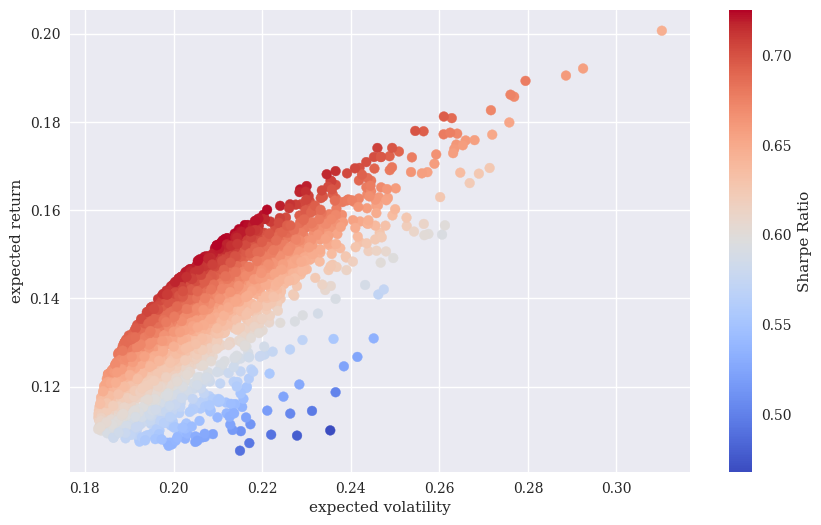

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')

In [139]:
import scipy.optimize as sco

Maximizing Sharpe

In [166]:
def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)


In [167]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

In [168]:
bnds = tuple((0,1) for x in range(len(stocks)))

In [169]:
noa = len(stocks) 
eweights = np.array(noa*[1/noa])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [170]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method = 'SLSQP', bounds=bnds, constraints=cons)

CPU times: total: 31.2 ms
Wall time: 52.3 ms


In [171]:
opts['x'].round(3)

array([0.166, 0.   , 0.436, 0.398])

In [172]:
print(port_ret(opts['x'].round(3)))
print(port_vol(opts['x'].round(3)))

0.15640100329595144
0.2152978866076673


Minimizing Variance

In [174]:
optv = sco.minimize(port_vol, eweights, method = 'SLSQP', bounds = bnds, constraints=cons)

In [175]:
optv['x'].round(3)

array([0.295, 0.281, 0.014, 0.41 ])

In [180]:
print(port_ret(optv['x']))
print(port_vol(optv['x']))

0.11155730685107912
0.1829436498360774


Efficient Frontier

In [181]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x)-1})

In [182]:
bnds = tuple((0,1) for x in weights)

In [194]:
%%time
trets = np.linspace(0.11, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method = 'SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)

CPU times: total: 1.52 s
Wall time: 2.45 s


In [195]:
tret = 0.18
res = sco.minimize(port_vol, eweights, method = 'SLSQP', bounds = bnds, constraints = cons)


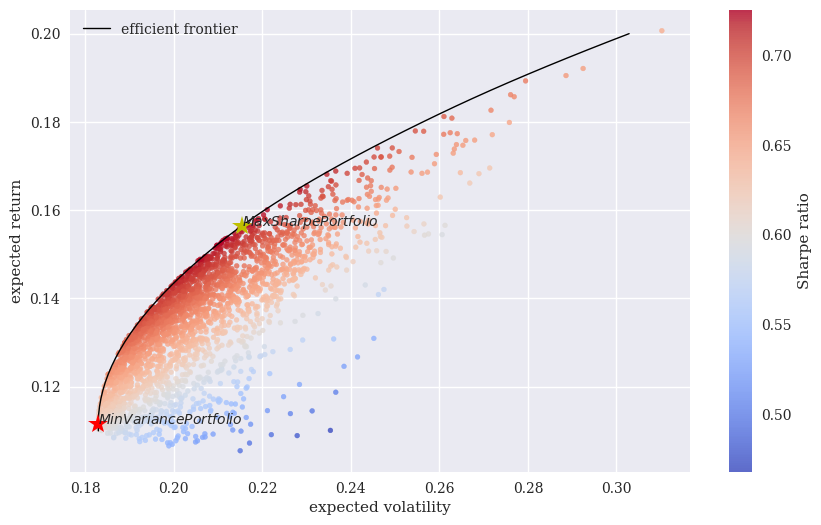

In [209]:
plt.figure(figsize=(10,6))
plt.scatter(pvols, prets, c=prets/pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'black', lw=1, label='efficient frontier')
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15)
plt.annotate('$Max Sharpe Portfolio$', (port_vol(opts['x']), port_ret(opts['x'])))
plt.annotate('$Min Variance Portfolio$', (port_vol(optv['x']), port_ret(optv['x'])))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.legend()